1. Download the dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

2. Load the dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (2).csv


In [3]:
import pandas as pd

In [4]:
d = pd.read_csv('Mall_Customers.csv')
d

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

3.  Perform Below Visualizations

*   Univariate Analysis



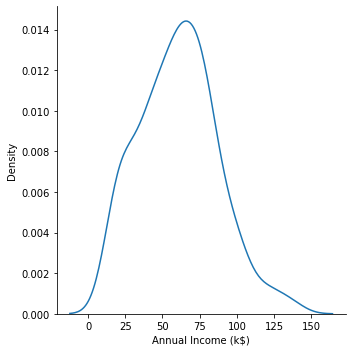

In [6]:
#dist plot of annual income
print(sns.displot(d['Annual Income (k$)'], kind ='kde'))

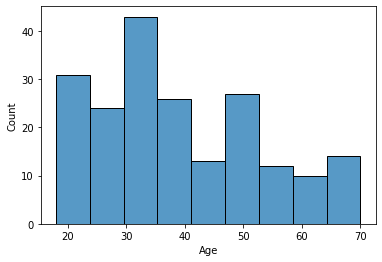

In [7]:
#hist of count of Rings
sns.histplot(d['Age'])

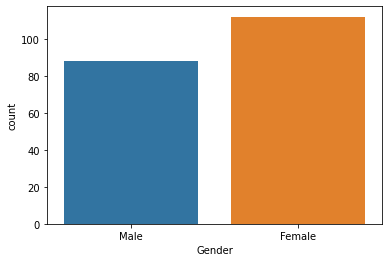

In [8]:
#count plot of Gender	
sns.countplot(d['Gender'])
plt.show()

3.  

*   Bi-Variate Analysis





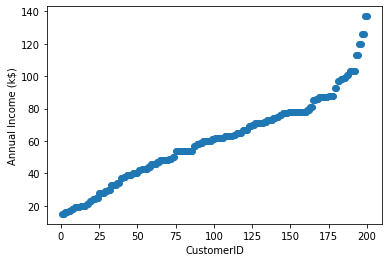

In [9]:
#scatter plot of age and EstimatedSalary
plt.scatter(d['CustomerID'],d['Annual Income (k$)'])
plt.xlabel('CustomerID')
plt.ylabel('Annual Income (k$)')
plt.show()

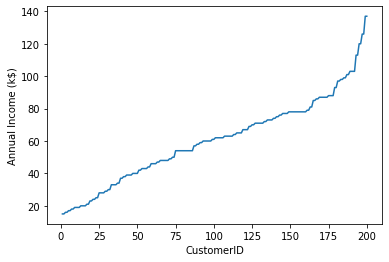

In [10]:
#line plot of age and balance
sns.lineplot(d['CustomerID'],d['Annual Income (k$)'])
plt.xlabel('CustomerID')
plt.ylabel('Annual Income (k$)')
plt.show()

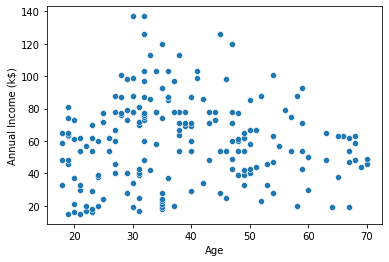

In [11]:
#scatter plot of Age and Annual Income (k$)
sns.scatterplot('Age','Annual Income (k$)',data=d)
plt.show()

3. 
* Multi-Variate Analysis

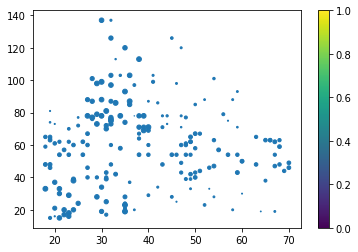

In [12]:
fig, ax = plt.subplots()
s = ax.scatter(d['Age'],d['Annual Income (k$)'],d['Spending Score (1-100)'],marker = '.',cmap = 'plasma')
fig.colorbar(s)
plt.show()

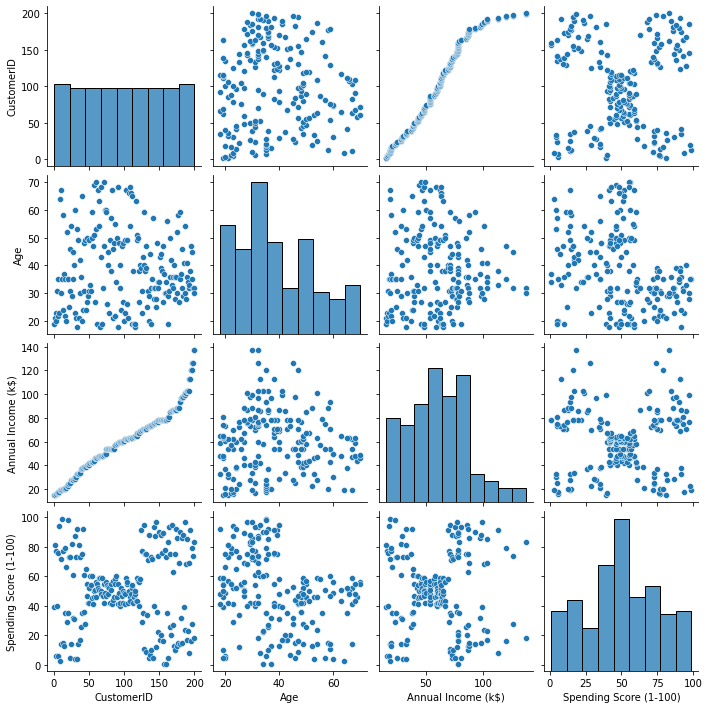

In [13]:
sns.pairplot(d)

4. Perform descriptive statistics on the dataset.


In [14]:
d.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


5. Check for Missing values and deal with them


In [15]:
d.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing values

If there are missing values (for eg in col 'tenure') we can fill it with mean using the command data['Tenure'].replace(np.NaN,data['Tenure'].mean())

6. Find the outliers and replace the outliers


[]

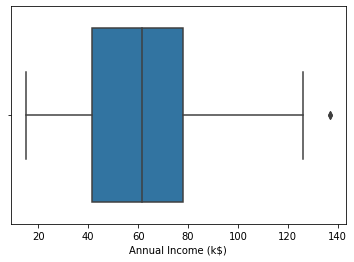

In [16]:
sns.boxplot(x='Annual Income (k$)',data=d)
plt.plot()

In [17]:
Q1 = d['Annual Income (k$)'].quantile(0.25)
Q3 = d['Annual Income (k$)'].quantile(0.75)
IQR = Q3-Q1

In [18]:
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

In [19]:
d["Annual Income (k$)"] = np.where(d["Annual Income (k$)"]> upper_limit, upper_limit,
                    np.where(d["Annual Income (k$)"]< lower_limit, lower_limit,
                    d["Annual Income (k$)"]))

In [20]:
d

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.00,39
1,2,Male,21,15.00,81
2,3,Female,20,16.00,6
3,4,Female,23,16.00,77
4,5,Female,31,17.00,40
...,...,...,...,...,...
195,196,Female,35,120.00,79
196,197,Female,45,126.00,28
197,198,Male,32,126.00,74
198,199,Male,32,132.75,18


[]

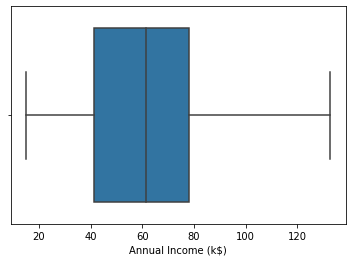

In [21]:
sns.boxplot(x='Annual Income (k$)',data=d)
plt.plot()

7. Check for Categorical columns and perform encoding.


In [22]:
d.select_dtypes(include=['object']).columns.tolist()

['Gender']

In [23]:
g = pd.get_dummies(d['Gender'])
d = pd.concat([d,g],axis =1)
d.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15.0,39,0,1
1,2,Male,21,15.0,81,0,1
2,3,Female,20,16.0,6,1,0
3,4,Female,23,16.0,77,1,0
4,5,Female,31,17.0,40,1,0


In [24]:
d = d.drop('Gender',axis =1)
d.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15.0,39,0,1
1,2,21,15.0,81,0,1
2,3,20,16.0,6,1,0
3,4,23,16.0,77,1,0
4,5,31,17.0,40,1,0


8. Scaling the data


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scale = StandardScaler()
d_scaled = scale.fit_transform(d)
d_scaled

array([[-1.7234121 , -1.42456879, -1.74542941, -0.43480148, -1.12815215,
         1.12815215],
       [-1.70609137, -1.28103541, -1.74542941,  1.19570407, -1.12815215,
         1.12815215],
       [-1.68877065, -1.3528021 , -1.70708307, -1.71591298,  0.88640526,
        -0.88640526],
       ...,
       [ 1.68877065, -0.49160182,  2.51101403,  0.92395314, -1.12815215,
         1.12815215],
       [ 1.70609137, -0.49160182,  2.76985181, -1.25005425, -1.12815215,
         1.12815215],
       [ 1.7234121 , -0.6351352 ,  2.76985181,  1.27334719, -1.12815215,
         1.12815215]])

9. Perform any of the clustering algorithms

In [27]:
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(n_clusters=2)

In [29]:
kmeans.fit(d)

KMeans(n_clusters=2)

In [30]:
y_predict = kmeans.fit_predict(d[['Age','Annual Income (k$)']])
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

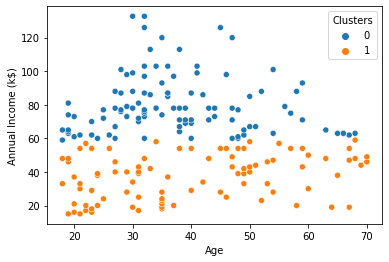

In [31]:
d['Clusters'] = kmeans.labels_
sns.scatterplot(x="Age", y="Annual Income (k$)",hue = 'Clusters', data=d)